In [5]:
def make_background_white(image):
    # Create a mask where pixel values are equal to 0
    mask = (image == 0)
    
    # Create a white background with the same shape as the image
    white_background = np.ones_like(image) * 255
    
    # Copy the white background to the original image where the mask is True
    image[mask] = white_background[mask]
    
    return image

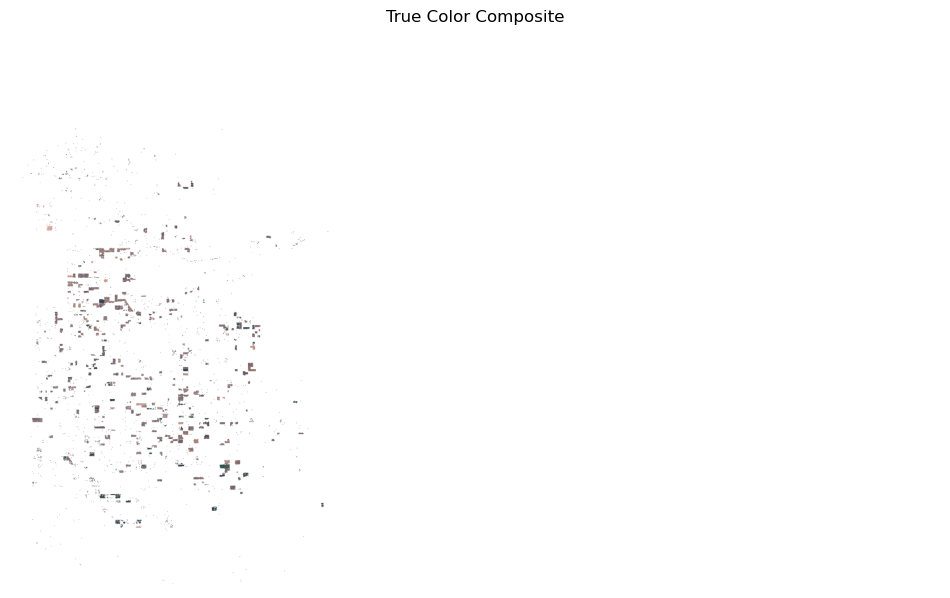

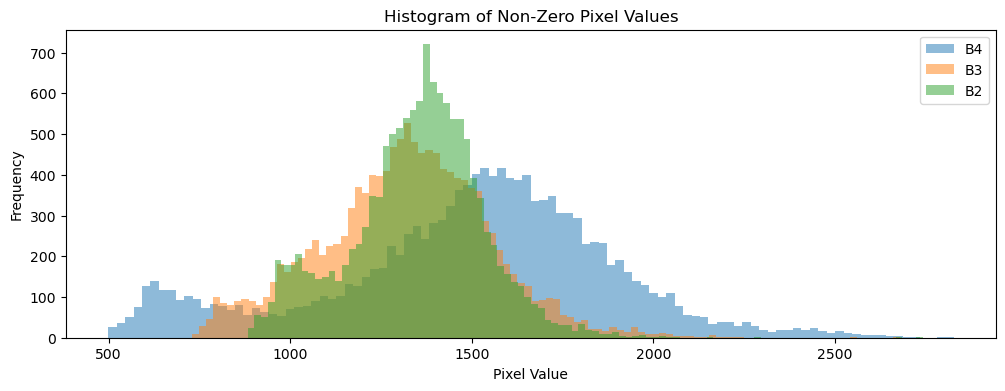

In [25]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

file_path = r'C:\Users\tskor\Documents\GitHub\inovation_project\0_Data\s2_data\images_Tulare_2018_9-10_100_.tif'
# Open the GeoTIFF file

# Define visualization parameters
vis_params = {
    "min": 0,
    "max": 3000,
    "bands": ["B4", "B3", "B2"],
}

# Map band names to band numbers (adjust these based on your file's structure)
band_map = {
    "B1": 1, "B2": 2, "B3": 3, "B4": 4, "B5": 5, "B6": 6, "B7": 7
}
with rasterio.open(file_path) as src:
    # Read the specified bands
    rgb = np.dstack([src.read(band_map[band]) for band in vis_params["bands"]])



    # Create a mask for non-zero pixels
    mask = np.any(rgb != 0, axis=-1)

    # Set a threshold for "near-black" pixels
    threshold = 700  # Adjust this value as needed

    # Create a mask for "near-black" pixels
    near_black_mask = np.all(rgb < threshold, axis=-1)

   # Clip values to the specified range
    rgb = np.clip(rgb, vis_params["min"], vis_params["max"])


    # Normalize the data to 0-1 range
    rgb_normalized = (rgb - vis_params["min"]) / (vis_params["max"] - vis_params["min"])

    # Replace NaN with 0
    rgb_normalized = np.nan_to_num(rgb_normalized, nan=1.0)

    # Plot the image
    plt.figure(figsize=(12, 8))
    plt.imshow(rgb_normalized)
    plt.axis('off')
    plt.title("True Color Composite")
    plt.show()

    # Display the histogram for non-zero pixels only
    plt.figure(figsize=(12, 4))
    for i, band in enumerate(vis_params["bands"]):
        band_data = rgb[mask, i]
        plt.hist(band_data, bins=100, alpha=0.5, label=band)
    plt.legend()
    plt.title("Histogram of Non-Zero Pixel Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()